In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_validate, train_test_split
from sklearn.metrics import make_scorer, precision_score, recall_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import pickle

In [1]:
import tensorflow as tf

# Check available GPUs
print("Num GPUs Available:", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available: 1


In [4]:
df = pd.read_csv('Crop_recommendation.csv')

In [5]:
df.head(5)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [7]:
A = df.drop(columns=["label"])

In [8]:
corr_matrix = A.corr()

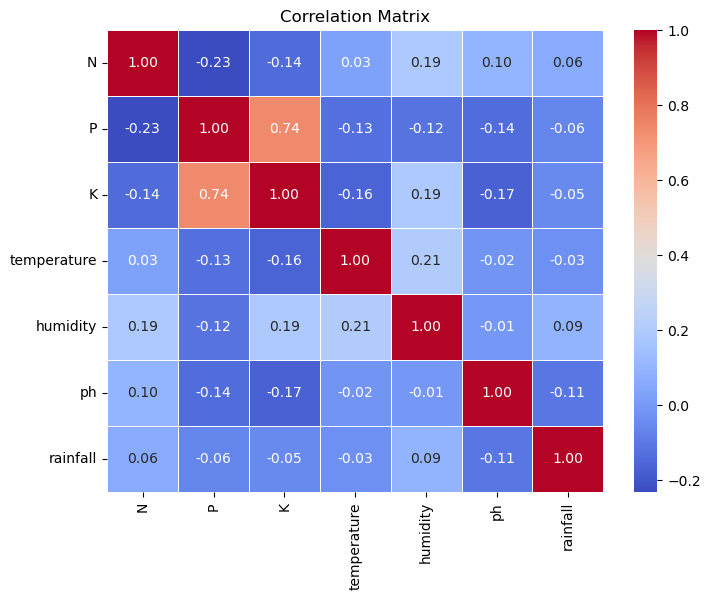

In [9]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)
plt.title("Correlation Matrix")
plt.show()

In [10]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [11]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [15]:
A.skew()

N              0.509721
P              1.010773
K              2.375167
temperature    0.184933
humidity      -1.091708
ph             0.283929
rainfall       0.965756
dtype: float64

In [16]:
X = df.drop(columns=['label'])

In [17]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [18]:
y = df['label']

In [19]:
y.head()

0    rice
1    rice
2    rice
3    rice
4    rice
Name: label, dtype: object

In [20]:
type(y)

pandas.core.series.Series

In [21]:
le = LabelEncoder()

y = le.fit_transform(y)
y=pd.Series(y)

In [22]:
type(y)

pandas.core.series.Series

In [23]:
model = XGBClassifier(n_estimators=100, eval_metric="mlogloss")
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model, X, y, cv=cv, scoring="accuracy")
print("Mean accuracy:", scores.mean())

Mean accuracy: 0.9927272727272726


In [24]:
print("Cross-validation scores:", scores)


Cross-validation scores: [0.99318182 0.98863636 0.99090909 0.99772727 0.99318182]


In [25]:
# Initialize model
model = XGBClassifier(n_estimators=100, eval_metric="mlogloss")

# Stratified K-Fold Cross-Validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define scoring metrics
scoring = {
    "accuracy": "accuracy",
    "precision": make_scorer(precision_score, average="weighted"),
    "recall": make_scorer(recall_score, average="weighted")
}

# Perform cross-validation
scores = cross_validate(model, X, y, cv=cv, scoring=scoring, return_train_score=False)

# Print results
print("Mean Accuracy:", scores["test_accuracy"])
print("Mean Precision:", scores["test_precision"])
print("Mean Recall:", scores["test_recall"])


Mean Accuracy: [0.99318182 0.98863636 0.99090909 0.99772727 0.99318182]
Mean Precision: [0.99370327 0.98906926 0.9912764  0.9978355  0.99329004]
Mean Recall: [0.99318182 0.98863636 0.99090909 0.99772727 0.99318182]


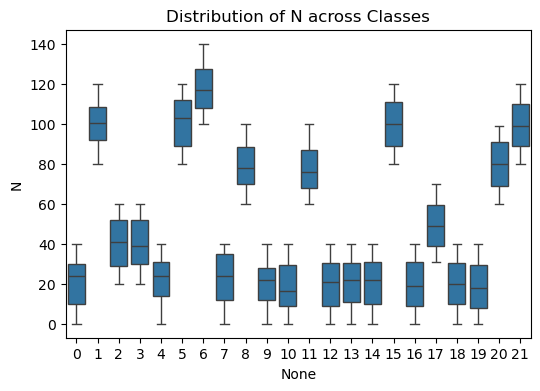

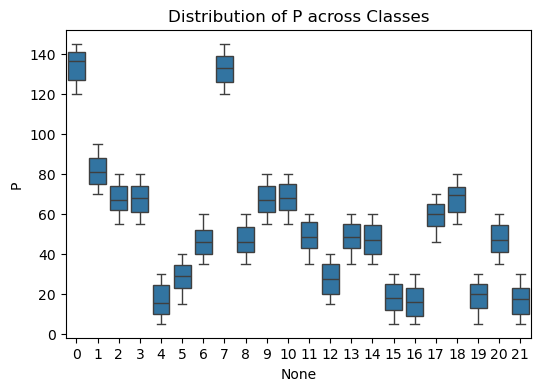

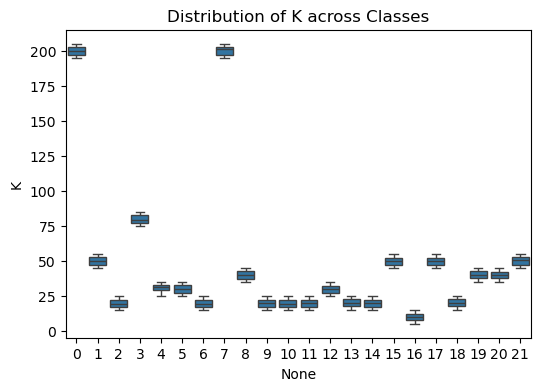

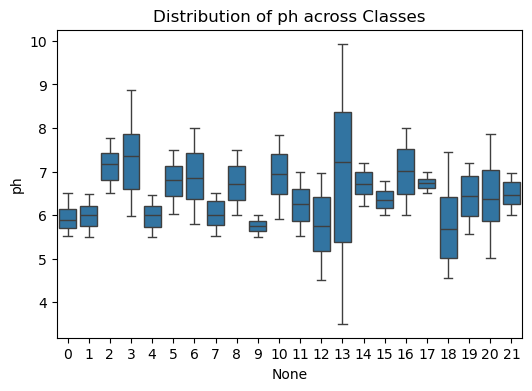

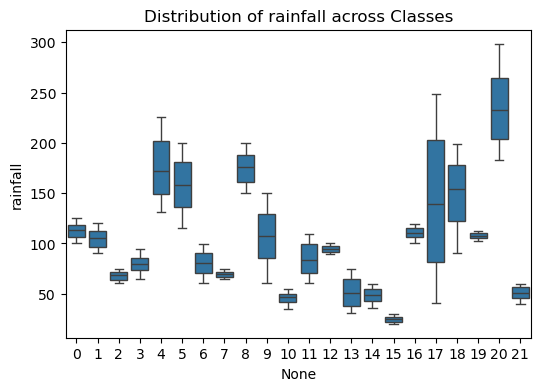

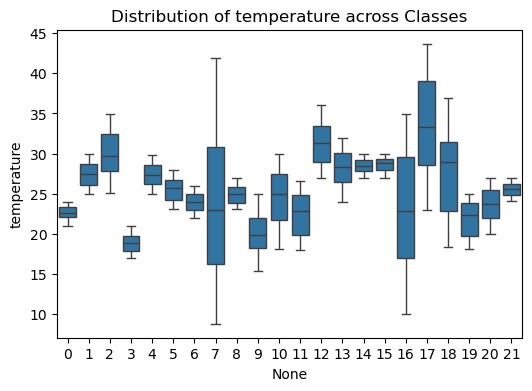

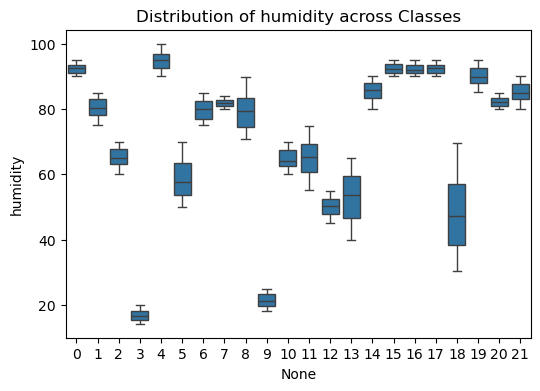

In [26]:
for feature in ["N", "P", "K", "ph", "rainfall", "temperature", "humidity"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=y, y=X[feature])
    plt.title(f"Distribution of {feature} across Classes")
    plt.show()


In [27]:
n_classes = 22
rows_per_class = 100
test_fraction = 0.2  #20% of each class for testing
test_rows = int(rows_per_class * test_fraction)

train_list = []
test_list = []

for i in range(n_classes):
    start = i * rows_per_class
    end = (i + 1) * rows_per_class
    class_data = df.iloc[start:end]
    #shuffle
    class_data = class_data.sample(frac=1, random_state=42).reset_index(drop=True)
    
    #split
    test_data = class_data.iloc[:test_rows]
    train_data = class_data.iloc[test_rows:]
    
    train_list.append(train_data)
    test_list.append(test_data)

#Concatenate
train_df = pd.concat(train_list, ignore_index=True)
test_df = pd.concat(test_list, ignore_index=True)

print("Training set shape:", train_df.shape)
print("Test set shape:", test_df.shape)


Training set shape: (1760, 8)
Test set shape: (440, 8)


In [28]:
features = ['N', 'P', 'K', 'ph', 'temperature', 'humidity', 'rainfall']
target = 'label'

le = LabelEncoder()
y_train = le.fit_transform(train_df[target])
y_test = le.transform(test_df[target])
X_train = train_df[features]
X_test = test_df[features]

model = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    eval_metric='mlogloss',
    early_stopping_rounds=10
)

model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=True
)

train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

train_acc = accuracy_score(y_train, train_preds)
test_acc = accuracy_score(y_test, test_preds)

print("Training Accuracy:", train_acc)
print("Test Accuracy:", test_acc)
print("\nClassification Report on Test Set:\n", 
      classification_report(y_test, test_preds, target_names=le.classes_))


[0]	validation_0-mlogloss:0.87893	validation_1-mlogloss:0.94491
[1]	validation_0-mlogloss:0.62099	validation_1-mlogloss:0.68898
[2]	validation_0-mlogloss:0.45317	validation_1-mlogloss:0.51812
[3]	validation_0-mlogloss:0.33608	validation_1-mlogloss:0.39718
[4]	validation_0-mlogloss:0.25164	validation_1-mlogloss:0.31035
[5]	validation_0-mlogloss:0.19003	validation_1-mlogloss:0.24682
[6]	validation_0-mlogloss:0.14473	validation_1-mlogloss:0.19949
[7]	validation_0-mlogloss:0.11134	validation_1-mlogloss:0.16396
[8]	validation_0-mlogloss:0.08641	validation_1-mlogloss:0.13641
[9]	validation_0-mlogloss:0.06801	validation_1-mlogloss:0.11601
[10]	validation_0-mlogloss:0.05409	validation_1-mlogloss:0.10016
[11]	validation_0-mlogloss:0.04373	validation_1-mlogloss:0.08804
[12]	validation_0-mlogloss:0.03586	validation_1-mlogloss:0.07872
[13]	validation_0-mlogloss:0.02988	validation_1-mlogloss:0.07189
[14]	validation_0-mlogloss:0.02526	validation_1-mlogloss:0.06593
[15]	validation_0-mlogloss:0.02171	

[0]	validation_0-mlogloss:0.87893	validation_1-mlogloss:0.94491
[1]	validation_0-mlogloss:0.62099	validation_1-mlogloss:0.68898
[2]	validation_0-mlogloss:0.45317	validation_1-mlogloss:0.51812


D:\ENVS\myenv\lib\site-packages\xgboost\core.py:158: UserWarning: [09:30:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[3]	validation_0-mlogloss:0.33608	validation_1-mlogloss:0.39718
[4]	validation_0-mlogloss:0.25164	validation_1-mlogloss:0.31035
[5]	validation_0-mlogloss:0.19003	validation_1-mlogloss:0.24682
[6]	validation_0-mlogloss:0.14473	validation_1-mlogloss:0.19949
[7]	validation_0-mlogloss:0.11134	validation_1-mlogloss:0.16396
[8]	validation_0-mlogloss:0.08641	validation_1-mlogloss:0.13641
[9]	validation_0-mlogloss:0.06801	validation_1-mlogloss:0.11601
[10]	validation_0-mlogloss:0.05409	validation_1-mlogloss:0.10016
[11]	validation_0-mlogloss:0.04373	validation_1-mlogloss:0.08804
[12]	validation_0-mlogloss:0.03586	validation_1-mlogloss:0.07872
[13]	validation_0-mlogloss:0.02988	validation_1-mlogloss:0.07189
[14]	validation_0-mlogloss:0.02526	validation_1-mlogloss:0.06593
[15]	validation_0-mlogloss:0.02171	validation_1-mlogloss:0.06025
[16]	validation_0-mlogloss:0.01901	validation_1-mlogloss:0.05718
[17]	validation_0-mlogloss:0.01683	validation_1-mlogloss:0.05512
[18]	validation_0-mlogloss:0.015

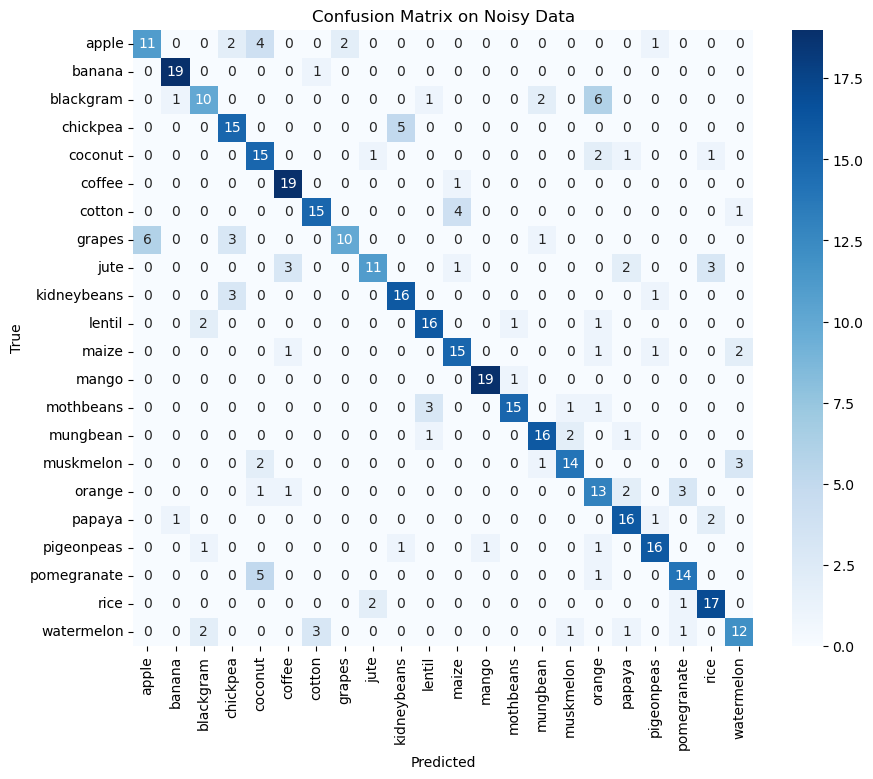

In [29]:
# Features and target column names
features = ['N', 'P', 'K', 'ph', 'temperature', 'humidity', 'rainfall']
target = 'label'

# Encode target labels
le = LabelEncoder()
y_train = le.fit_transform(train_df[target])
y_test = le.transform(test_df[target])
X_train = train_df[features]
X_test = test_df[features]

# ---------------------------
# Train the final model with early stopping
final_model = xgb.XGBClassifier(
    n_estimators=100,
    random_state=42,
    use_label_encoder=False,
    eval_metric='mlogloss',
    early_stopping_rounds=10
)

final_model.fit(
    X_train, y_train,
    eval_set=[(X_train, y_train), (X_test, y_test)],
    verbose=True
)

# ---------------------------
# Add synthetic noise to the test data
# ---------------------------
# Create a copy of the test set to add noise
X_test_noisy = X_test.copy()

# Define a noise factor (e.g., 10% of the standard deviation of each feature)
noise_factor = 0.2

for col in features:
    # Calculate the standard deviation of the current feature
    std = X_test[col].std()
    # Generate Gaussian noise: mean=0, std=noise_factor*std
    noise = np.random.normal(0, noise_factor * std, size=X_test.shape[0])
    # Add the noise to the feature column
    X_test_noisy[col] = X_test[col] + noise

# ---------------------------
# Evaluate the model on the noisy test data
# ---------------------------
noisy_preds = final_model.predict(X_test_noisy)

# Calculate accuracy
accuracy_noisy = accuracy_score(y_test, noisy_preds)
print("Test Accuracy on Noisy Data:", accuracy_noisy)

# Print the classification report
print("\nClassification Report on Noisy Data:\n",
      classification_report(y_test, noisy_preds, target_names=le.classes_))

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, noisy_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix on Noisy Data")
plt.show()


In [30]:
df = pd.read_csv("Crop_recommendation.csv")

In [31]:
df['rainfall'].mean()

103.46365541576817

In [32]:
df['rainfall'].median()

94.86762427

In [33]:
df['rainfall'].std()

54.95838852487811

In [34]:
df['temperature'].mean()

25.616243851779544

In [35]:
df['temperature'].median()

25.5986932

In [36]:
rf_model = RandomForestClassifier(
    n_estimators=100,            # Try 100-200 trees
    max_depth=10,                # Limit depth to prevent overfitting
    min_samples_split=5,         # Require more samples to split a node
    min_samples_leaf=2,          # Require at least 2 samples in leaf nodes
    max_features='sqrt',         # Consider sqrt(n_features) at each split
    bootstrap=True,              # Use bootstrapping
    oob_score=True,              # Use out-of-bag samples to estimate accuracy
    random_state=42              # For reproducibility
)

In [37]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, min_samples_split=5,
                       oob_score=True, random_state=42)

In [38]:
y_pred = rf_model.predict(X_test)

In [39]:
print(y_pred)

[ 8 20 20  8 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 20 11 11 11 11
 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11 11  3  3  3  3  3  3  3  3
  3  3  3  3  3  3  3  3  3  3  3  3  9  9  9  9  9  9  9  9  9  9  9  9
  9  9  9  9  9  9  9  9 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18 18
 18 18 18 18 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14 14  2  2  2  2
  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2  2 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 19 19 19 19 19 19 19 19 19 19 19 19
 19 19 19 19 19 19 19 19  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12 12
  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7  7 21 21 21 21
 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 21 15 15 15 15 15 15 15 15
 15 15 15 15 15 15 15 15 15 15 15 15  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 16 16 16 16 16 16 16 16 16

In [41]:
accuracy = accuracy_score(y_test, y_pred)

In [42]:
print(accuracy)

0.9954545454545455


In [43]:
report = classification_report(y_test, y_pred)

In [44]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       0.91      1.00      0.95        20
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        20
          17       1.00    

In [45]:
y_proba = model.predict_proba(X_test)

In [46]:
confidences = np.max(y_proba, axis=1)

In [47]:
print(confidences)

[0.71136194 0.9958246  0.8756441  0.7032945  0.99550617 0.99355537
 0.9927816  0.86175627 0.99449086 0.99293065 0.9976421  0.99632794
 0.9349586  0.9959266  0.99507844 0.99717736 0.9914854  0.9837668
 0.9964993  0.9904241  0.9976351  0.9880441  0.9960594  0.9964478
 0.99728847 0.97409445 0.9971987  0.95531416 0.99714535 0.99770784
 0.9959122  0.96295696 0.99715686 0.9955537  0.9918358  0.99494344
 0.99746275 0.996518   0.9900281  0.99674916 0.99535865 0.99307704
 0.99492836 0.9964353  0.99529904 0.9958691  0.9958973  0.99645495
 0.9960289  0.99631554 0.9939056  0.99558866 0.9311632  0.99579144
 0.9936114  0.9964353  0.9956868  0.99590635 0.9962585  0.9946143
 0.9965469  0.99311674 0.9959337  0.99474335 0.9975261  0.99530834
 0.99582905 0.99691606 0.99550533 0.9971648  0.99585307 0.993701
 0.99461293 0.99586236 0.9917759  0.99617577 0.9950251  0.9974154
 0.994038   0.99596065 0.9945733  0.985209   0.95918685 0.835446
 0.9977393  0.60977614 0.98656696 0.94522595 0.18445016 0.9953629
 0.9

In [48]:
print(print(f"Average prediction confidence: {confidences.mean():.4f}"))

Average prediction confidence: 0.9823
None


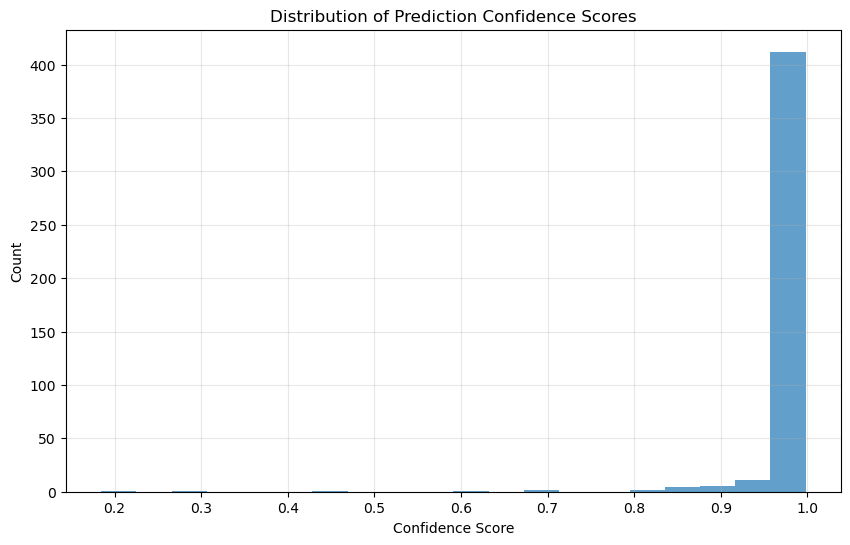

In [49]:
plt.figure(figsize=(10, 6))
plt.hist(confidences, bins=20, alpha=0.7)
plt.title('Distribution of Prediction Confidence Scores')
plt.xlabel('Confidence Score')
plt.ylabel('Count')
plt.grid(alpha=0.3)
plt.show()

In [50]:
# First, create a completely held-out test set
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, 
    test_size=0.2,
    random_state=42, 
    stratify=y
)

# For pandas DataFrames, we need to use .iloc indexing
n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Lists to store results
cv_accuracies = []
cv_noisy_accuracies = []
cv_test_accuracies = []

for fold, (train_idx, val_idx) in enumerate(skf.split(X_train_val, y_train_val)):
    # Use .iloc for pandas DataFrames or .loc with index values
    if hasattr(X_train_val, 'iloc'):
        # If X_train_val is a DataFrame
        X_train_fold = X_train_val.iloc[train_idx]
        X_val_fold = X_train_val.iloc[val_idx]
    else:
        # If X_train_val is a numpy array
        X_train_fold = X_train_val[train_idx]
        X_val_fold = X_train_val[val_idx]
    
    # Same for y
    if hasattr(y_train_val, 'iloc'):
        y_train_fold = y_train_val.iloc[train_idx]
        y_val_fold = y_train_val.iloc[val_idx]
    else:
        y_train_fold = y_train_val[train_idx]
        y_val_fold = y_train_val[val_idx]
    
    # Convert to numpy arrays if they're still DataFrames
    X_train_fold_np = X_train_fold.values if hasattr(X_train_fold, 'values') else X_train_fold
    X_val_fold_np = X_val_fold.values if hasattr(X_val_fold, 'values') else X_val_fold
    
    # Add noise to validation data to test robustness
    X_val_fold_noisy = X_val_fold_np + np.random.normal(0, 0.2, X_val_fold_np.shape)
    
    # Train the model
    model = RandomForestClassifier(
        n_estimators=100,
        max_depth=6,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        bootstrap=True,
        random_state=42
    )
    
    # Train on clean data
    model.fit(X_train_fold, y_train_fold)
    
    # Evaluate on validation data
    val_acc = accuracy_score(y_val_fold, model.predict(X_val_fold))
    
    # Evaluate on noisy validation data
    val_acc_noisy = accuracy_score(y_val_fold, model.predict(X_val_fold_noisy))
    
    # Evaluate on test data
    test_acc = accuracy_score(y_test, model.predict(X_test))
    
    print(f"Fold {fold+1}:")
    print(f"  Validation accuracy (clean): {val_acc:.4f}")
    print(f"  Validation accuracy (noisy): {val_acc_noisy:.4f}")
    print(f"  Test accuracy: {test_acc:.4f}")
    print(f"  Difference (clean vs noisy): {val_acc - val_acc_noisy:.4f}")
    
    cv_accuracies.append(val_acc)
    cv_noisy_accuracies.append(val_acc_noisy)
    cv_test_accuracies.append(test_acc)

print("\nCross-validation results:")
print(f"Average validation accuracy (clean): {np.mean(cv_accuracies):.4f} ± {np.std(cv_accuracies):.4f}")
print(f"Average validation accuracy (noisy): {np.mean(cv_noisy_accuracies):.4f} ± {np.std(cv_noisy_accuracies):.4f}")
print(f"Average test accuracy: {np.mean(cv_test_accuracies):.4f} ± {np.std(cv_test_accuracies):.4f}")
print(f"Average performance drop with noise: {np.mean(np.array(cv_accuracies) - np.array(cv_noisy_accuracies)):.4f}")

D:\ENVS\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Fold 1:
  Validation accuracy (clean): 0.9972
  Validation accuracy (noisy): 0.9972
  Test accuracy: 0.9932
  Difference (clean vs noisy): 0.0000


D:\ENVS\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Fold 2:
  Validation accuracy (clean): 0.9943
  Validation accuracy (noisy): 0.9915
  Test accuracy: 0.9932
  Difference (clean vs noisy): 0.0028


D:\ENVS\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Fold 3:
  Validation accuracy (clean): 0.9801
  Validation accuracy (noisy): 0.9716
  Test accuracy: 0.9955
  Difference (clean vs noisy): 0.0085


D:\ENVS\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Fold 4:
  Validation accuracy (clean): 0.9886
  Validation accuracy (noisy): 0.9886
  Test accuracy: 0.9909
  Difference (clean vs noisy): 0.0000
Fold 5:
  Validation accuracy (clean): 0.9943
  Validation accuracy (noisy): 0.9943
  Test accuracy: 0.9886
  Difference (clean vs noisy): 0.0000

Cross-validation results:
Average validation accuracy (clean): 0.9909 ± 0.0061
Average validation accuracy (noisy): 0.9886 ± 0.0090
Average test accuracy: 0.9923 ± 0.0023
Average performance drop with noise: 0.0023


D:\ENVS\myenv\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [51]:
# X_test = X_test.reset_index(drop=True)

In [52]:
input_data = pd.DataFrame([[75,38,39,6.215110,23.446768,84.793524,283.933847]], columns=features)

In [53]:
rf_model.predict(input_data)

array([20])

In [ ]:
# with open("random_forest_classifier.pkl","wb") as file:
#     pickle.dump(rf_model, file)

In [55]:
with open("random_forest_classifier.pkl","rb") as file:
    pickle.load(file)

In [56]:
rf_model.feature_names_in_

array(['N', 'P', 'K', 'ph', 'temperature', 'humidity', 'rainfall'],
      dtype=object)

In [57]:
X_test = X_test[rf_model.feature_names_in_]

In [133]:
y_pred = rf_model.predict(X_test)

In [134]:
report = classification_report(y_pred, y_test)

In [135]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        20
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        20
           4       1.00      1.00      1.00        20
           5       1.00      1.00      1.00        20
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        20
           8       1.00      0.95      0.98        21
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        20
          11       1.00      1.00      1.00        20
          12       1.00      1.00      1.00        20
          13       1.00      1.00      1.00        20
          14       1.00      1.00      1.00        20
          15       1.00      1.00      1.00        20
          16       1.00      1.00      1.00        20
          17       1.00    

In [61]:
crops = df.label.unique()

In [62]:
crops

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [63]:
crop_means = df.groupby("label")[["N", "P", "K", "rainfall", "ph", "humidity", "temperature"]].mean()

In [64]:
crop_means

,N,P,K,rainfall,ph,humidity,temperature
label,,,,,,,
apple,20.80,134.22,199.89,112.654779,5.929663,92.333383,22.630942
banana,100.23,82.01,50.05,104.626980,5.983893,80.358123,27.376798
blackgram,40.02,67.47,19.24,67.884151,7.133952,65.118426,29.973340
chickpea,40.09,67.79,79.92,80.058977,7.336957,16.860439,18.872847
coconut,21.98,16.93,30.59,175.686646,5.976562,94.844272,27.409892
coffee,101.20,28.74,29.94,158.066295,6.790308,58.869846,25.540477
cotton,117.77,46.24,19.56,80.398043,6.912675,79.843474,23.988958
grapes,23.18,132.53,200.11,69.611829,6.025937,81.875228,23.849575
jute,78.40,46.86,39.99,174.792798,6.732778,79.639864,24.958376


In [65]:
crop_means.loc['apple']

N               20.800000
P              134.220000
K              199.890000
rainfall       112.654779
ph               5.929663
humidity        92.333383
temperature     22.630942
Name: apple, dtype: float64

In [66]:
crop_means.columns

Index(['N', 'P', 'K', 'rainfall', 'ph', 'humidity', 'temperature'], dtype='object')

In [67]:
def soil_ammender_recommendations(crop, values):
    crop = crop.lower()
    if crop not in crop_means.index:
        return f"Crop '{crop}' not found in dataset."
    crop_avgs = crop_means.loc[crop]
    differences = crop_avgs - values
    return differences

In [68]:
current_values = np.array([85, 45, 38, 160, 6.3, 68, 24])
diffs = soil_ammender_recommendations("Rice", current_values)
print(diffs)

N              -5.110000
P               2.580000
K               1.870000
rainfall       76.181114
ph              0.125471
humidity       14.272822
temperature    -0.310668
Name: rice, dtype: float64


In [155]:
df = pd.read_csv("Crop_recommendation.csv")
crop_means = df.groupby("label")[["N", "P", "K", "rainfall", "ph", "humidity", "temperature"]].mean()
column_names = crop_means.columns
area_sqft = 10000


def water_amount(area_sqft, rainfall_deficit_mm):
    area_m2 = area_sqft * 0.0929  # square feet to square meters
    water_liters = rainfall_deficit_mm * area_m2  # mm deficit to liters
    return water_liters

def soil_amendment_recommendations(crop, current_values, column_names, area_sqft):
    crop = crop.lower()
    if crop not in crop_means.index:
        return f"Crop '{crop}' not found in dataset."
    
    crop_avgs = crop_means.loc[crop]
    differences = crop_avgs - current_values
    
    # Create a dictionary to map column indices to their names
    value_dict = {name: (current, optimal, diff) for name, current, optimal, diff in 
                  zip(column_names, current_values, crop_avgs, differences)}
    
    # Define thresholds for significant deviations
    thresholds = {
        'N': 10,        # Nitrogen threshold
        'P': 5,         # Phosphorus threshold
        'K': 5,         # Potassium threshold
        'rainfall': 50, # Rainfall threshold in mm
        'ph': 0.5,      # pH threshold
        'humidity': 10, # Humidity threshold
        'temperature': 2 # Temperature threshold
    }
    
    recommendations = []
    environment_factors = []
    soil_factors = []
    
    # Check soil nutrients (N, P, K)
    for nutrient in ['N', 'P', 'K']:
        current, optimal, diff = value_dict[nutrient]
        if abs(diff) > thresholds[nutrient]:
            if diff > 0:
                soil_factors.append(f"The soil is deficient in {nutrient}. Current level is {current:.3f}, but optimal level for {crop} is around {optimal:.3f}. Consider adding {nutrient}-rich fertilizer to increase by approximately {abs(diff):.3f} units.")
            else:
                soil_factors.append(f"The soil has excess {nutrient}. Current level is {current:.3f}, but optimal level for {crop} is around {optimal:.3f}. Avoid adding more {nutrient} fertilizers for now.")
        else:
            soil_factors.append(f"The {nutrient} level is within acceptable range for {crop} cultivation (current: {current:.3f}, optimal: {optimal:.3f}).")
    
    # Check pH
    current, optimal, diff = value_dict['ph']
    if abs(diff) > thresholds['ph']:
        if diff > 0:
            soil_factors.append(f"The soil pH is too acidic at {current:.3f}. Optimal pH for {crop} is around {optimal:.3f}. Consider adding agricultural lime to raise the pH by approximately {abs(diff):.3f} units.")
        else:
            soil_factors.append(f"The soil pH is too alkaline at {current:.3f}. Optimal pH for {crop} is around {optimal:.3f}. Consider adding sulfur or organic matter to lower the pH by approximately {abs(diff):.3f} units.")
    else:
        soil_factors.append(f"The soil pH of {current:.3f} is within optimal range for {crop} cultivation (optimal: {optimal:.3f}).")
    
    # Check environmental factors
    for factor in ['rainfall', 'humidity', 'temperature']:
        current, optimal, diff = value_dict[factor]
        if abs(diff) > thresholds[factor]:
            if factor == 'rainfall':
                if diff > 0:
                    environment_factors.append(f"The area receives insufficient rainfall. Current average is {current:.3f}mm, but {crop} typically requires around {optimal:.3f}mm. Consider supplemental irrigation of approximately {abs(water_amount(area_sqft,diff)):.3f}litres")
                else:
                    environment_factors.append(f"The area receives excess rainfall. Current average is {current:.3f}mm, but {crop} typically grows best with around {optimal:.3f}mm. Consider improved drainage systems to manage excess {abs(diff):.3f}mm.")
            elif factor == 'humidity':
                if diff > 0:
                    environment_factors.append(f"The humidity level is too low at {current:.3f}%. Optimal humidity for {crop} is around {optimal:.3f}%. This may increase water requirements by approximately {abs(diff):.3f}%.")
                else:
                    environment_factors.append(f"The humidity level is too high at {current:.3f}%. Optimal humidity for {crop} is around {optimal:.3f}%. This may increase disease risk by approximately {abs(diff):.3f}%.")
            elif factor == 'temperature':
                if diff > 0:
                    environment_factors.append(f"The temperature is too cool at {current:.3f}°C. Optimal temperature for {crop} is around {optimal:.3f}°C. Consider adjusting planting date or using row covers to increase temperature by approximately {abs(diff):.3f}°C.")
                else:
                    environment_factors.append(f"The temperature is too warm at {current:.3f}°C. Optimal temperature for {crop} is around {optimal:.3f}°C. Consider providing shade or adjusting planting date to decrease temperature by approximately {abs(diff):.3f}°C.")
        else:
            environment_factors.append(f"The {factor} level of {current:.3f} is suitable for {crop} cultivation (optimal: {optimal:.3f}).")
    
    # Create final recommendation summary
    summary = f"## Soil Amendment Recommendations for {crop.title()} Cultivation\n\n"
    
    summary += "### Soil Nutrient Analysis\n"
    for rec in soil_factors:
        summary += f"- {rec}\n"
    
    summary += "\n### Environmental Factors\n"
    for rec in environment_factors:
        summary += f"- {rec}\n"
    
    # Overall suitability assessment
    significant_deviations = sum(1 for factor, (current, optimal, diff) in value_dict.items() 
                               if abs(diff) > thresholds.get(factor, 0))
    total_factors = len(value_dict)
    
    if significant_deviations == 0:
        summary += "\n### Overall Assessment\n"
        summary += f"Your conditions are excellent for {crop} cultivation! All measured parameters are within optimal ranges.\n"
    elif significant_deviations <= 2:
        summary += "\n### Overall Assessment\n"
        summary += f"Your conditions are generally favorable for {crop} cultivation with minor adjustments needed as noted above.\n"
    elif significant_deviations <= 4:
        summary += "\n### Overall Assessment\n"
        summary += f"Your conditions require moderate adjustments for optimal {crop} cultivation. Address the factors mentioned above to improve potential yield.\n"
    else:
        summary += "\n### Overall Assessment\n"
        summary += f"Your conditions present significant challenges for {crop} cultivation. Consider implementing the recommendations above or evaluating alternative crops better suited to your conditions.\n"
    
    return summary

# sample input
column_names = ['N', 'P', 'K', 'rainfall', 'ph', 'humidity', 'temperature']
current_values = np.array([85, 45, 38, 160, 6.3, 68, 24])
recommendations = soil_amendment_recommendations("Rice", current_values, column_names, area_sqft)
print(recommendations)

In [82]:
def water_amount(area_sqft, rainfall_deficit):
    area_m = area_sqft * 0.0929
    water = 70 * area_m
    return water

In [156]:
column_names = ['N', 'P', 'K', 'rainfall', 'ph', 'humidity', 'temperature']
current_values = np.array([85, 45, 38, 160, 6.3, 68, 24])
recommendations = soil_amendment_recommendations("Rice", current_values, column_names, area_sqft)
print(recommendations)

## Soil Amendment Recommendations for Rice Cultivation

### Soil Nutrient Analysis
- The N level is within acceptable range for rice cultivation (current: 85.000, optimal: 79.890).
- The P level is within acceptable range for rice cultivation (current: 45.000, optimal: 47.580).
- The K level is within acceptable range for rice cultivation (current: 38.000, optimal: 39.870).
- The soil pH of 6.300 is within optimal range for rice cultivation (optimal: 6.425).

### Environmental Factors
- The area receives insufficient rainfall. Current average is 160.000mm, but rice typically requires around 236.181mm. Consider supplemental irrigation of approximately 70772.255litres
- The humidity level is too low at 68.000%. Optimal humidity for rice is around 82.273%. This may increase water requirements by approximately 14.273%.
- The temperature level of 24.000 is suitable for rice cultivation (optimal: 23.689).

### Overall Assessment
Your conditions are generally favorable for rice cultivation wi

In [160]:
df.label.unique()


array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [170]:
original_labels = le.inverse_transform([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21])

In [171]:
original_labels

array(['apple', 'banana', 'blackgram', 'chickpea', 'coconut', 'coffee',
       'cotton', 'grapes', 'jute', 'kidneybeans', 'lentil', 'maize',
       'mango', 'mothbeans', 'mungbean', 'muskmelon', 'orange', 'papaya',
       'pigeonpeas', 'pomegranate', 'rice', 'watermelon'], dtype=object)